In [1]:
import pandas as pd

In [2]:
import requests

In [3]:
apikey = "PJxL%2BXY%2F3jCY4HSnB6mvwYVVe%2FRjjeO2Mh0HsQUsNo%2FrFTh3m87PBCzUhIEDInkArvhb5jRrWxzoq5JWW97Eow%3D%3D"
pageNo = 1
numOfRows = 10
startCreateDt = 20200120
endCreateDt = 20220811


api = "http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19InfStateJson?serviceKey={key}&pageNo={no}&numOfRows={row}&startCreateDt={scd}&endCreateDt={ecd}"

url = api.format(no=pageNo, row= numOfRows,
                 scd=startCreateDt, ecd=endCreateDt,
                 key=apikey)

response = requests.get(url)
print(response.content)

b'<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultCode>00</resultCode><resultMsg>NORMAL SERVICE.</resultMsg></header><body><items><item><createDt>2022-08-11 09:10:29.411</createDt><deathCnt>25441</deathCnt><decideCnt>20983126</decideCnt><seq>971</seq><stateDt>20220811</stateDt><stateTime>00:00</stateTime><updateDt>2022-08-12 08:42:19.947</updateDt></item><item><createDt>2022-08-10 09:21:32.068</createDt><deathCnt>25382</deathCnt><decideCnt>20845885</decideCnt><seq>970</seq><stateDt>20220810</stateDt><stateTime>00:00</stateTime><updateDt>2022-08-12 08:42:34.587</updateDt></item><item><createDt>2022-08-09 09:06:13.288</createDt><deathCnt>25332</deathCnt><decideCnt>20694119</decideCnt><seq>969</seq><stateDt>20220809</stateDt><stateTime>00:00</stateTime><updateDt>2022-08-12 08:42:50.769</updateDt></item><item><createDt>2022-08-08 09:03:33.354</createDt><deathCnt>25292</deathCnt><decideCnt>20544248</decideCnt><seq>968</seq><stateDt>20220808</stateDt><stateTim

In [4]:
from bs4 import BeautifulSoup  # 텍스트 뽑아오기 가능한 라이브러리
import requests

In [5]:
re = response.text
re

'<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultCode>00</resultCode><resultMsg>NORMAL SERVICE.</resultMsg></header><body><items><item><createDt>2022-08-11 09:10:29.411</createDt><deathCnt>25441</deathCnt><decideCnt>20983126</decideCnt><seq>971</seq><stateDt>20220811</stateDt><stateTime>00:00</stateTime><updateDt>2022-08-12 08:42:19.947</updateDt></item><item><createDt>2022-08-10 09:21:32.068</createDt><deathCnt>25382</deathCnt><decideCnt>20845885</decideCnt><seq>970</seq><stateDt>20220810</stateDt><stateTime>00:00</stateTime><updateDt>2022-08-12 08:42:34.587</updateDt></item><item><createDt>2022-08-09 09:06:13.288</createDt><deathCnt>25332</deathCnt><decideCnt>20694119</decideCnt><seq>969</seq><stateDt>20220809</stateDt><stateTime>00:00</stateTime><updateDt>2022-08-12 08:42:50.769</updateDt></item><item><createDt>2022-08-08 09:03:33.354</createDt><deathCnt>25292</deathCnt><decideCnt>20544248</decideCnt><seq>968</seq><stateDt>20220808</stateDt><stateTime

In [6]:
soup = BeautifulSoup(re, 'html.parser')
soup

C:\Users\admin\Anaconda3\lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultcode>00</resultcode><resultmsg>NORMAL SERVICE.</resultmsg></header><body><items><item><createdt>2022-08-11 09:10:29.411</createdt><deathcnt>25441</deathcnt><decidecnt>20983126</decidecnt><seq>971</seq><statedt>20220811</statedt><statetime>00:00</statetime><updatedt>2022-08-12 08:42:19.947</updatedt></item><item><createdt>2022-08-10 09:21:32.068</createdt><deathcnt>25382</deathcnt><decidecnt>20845885</decidecnt><seq>970</seq><statedt>20220810</statedt><statetime>00:00</statetime><updatedt>2022-08-12 08:42:34.587</updatedt></item><item><createdt>2022-08-09 09:06:13.288</createdt><deathcnt>25332</deathcnt><decidecnt>20694119</decidecnt><seq>969</seq><statedt>20220809</statedt><statetime>00:00</statetime><updatedt>2022-08-12 08:42:50.769</updatedt></item><item><createdt>2022-08-08 09:03:33.354</createdt><deathcnt>25292</deathcnt><decidecnt>20544248</decidecnt><seq>968</seq><statedt>20220808</statedt><statetime>

In [7]:
state_list = soup.find_all('statedt')
state_list[0]

<statedt>20220811</statedt>

In [8]:
decide_list = soup.find_all('decidecnt')
decide_list[0]

<decidecnt>20983126</decidecnt>

In [9]:
death_list = soup.find_all('deathcnt')
death_list[0]

<deathcnt>25441</deathcnt>

In [10]:
state_list = soup.find_all('statedt')
decide_list = soup.find_all('decidecnt')
death_list = soup.find_all('deathcnt')

sdt_list = []
dc_list=[]
de_list = []

for i in range(len(state_list)):
    sdt_list.append(state_list[i].text)
    dc_list.append(decide_list[i].text)    
    de_list.append(death_list[i].text)    
    
# print(sdt_list)
# print(dc_list)
# print(de_list)

In [11]:
df = pd.DataFrame({'기준일자' : sdt_list,
                   '확진자수' : dc_list,
                   '사망자수' : de_list})

df = df.reset_index(drop=True)
df

,기준일자,확진자수,사망자수
0,20220811,20983126,25441
1,20220810,20845885,25382
2,20220809,20694119,25332
3,20220808,20544248,25292
4,20220807,20488984,25263
...,...,...,...
928,20200124,2,0
929,20200123,1,0
930,20200122,1,0
931,20200121,1,0


In [12]:
df.to_csv('./data/코로나_감염현황.csv', index=False)

In [13]:
df['기준년도'] = df['기준일자'].str.slice(0,4)
df['기준월'] = df['기준일자'].str.slice(4,6)
df

,기준일자,확진자수,사망자수,기준년도,기준월
0,20220811,20983126,25441,2022,08
1,20220810,20845885,25382,2022,08
2,20220809,20694119,25332,2022,08
3,20220808,20544248,25292,2022,08
4,20220807,20488984,25263,2022,08
...,...,...,...,...,...
928,20200124,2,0,2020,01
929,20200123,1,0,2020,01
930,20200122,1,0,2020,01
931,20200121,1,0,2020,01


In [14]:
df['기준월']

0      08
1      08
2      08
3      08
4      08
       ..
928    01
929    01
930    01
931    01
932    01
Name: 기준월, Length: 933, dtype: object

In [15]:
weather = []

for i in range(0, len(df['기준월'])):
    if df['기준월'][i] >= '06' and  df['기준월'][i] <= '08':
        weather.append('여름')
    elif df['기준월'][i] >= '01' and  df['기준월'][i] <= '02':
        weather.append('겨울')
    elif df['기준월'][i] == '12' :
        weather.append('겨울')
    elif df['기준월'][i] >= '03' and  df['기준월'][i] <= '05':
        weather.append('봄')
    else:
        weather.append('가을')
        
df['계절'] = weather
df

,기준일자,확진자수,사망자수,기준년도,기준월,계절
0,20220811,20983126,25441,2022,08,여름
1,20220810,20845885,25382,2022,08,여름
2,20220809,20694119,25332,2022,08,여름
3,20220808,20544248,25292,2022,08,여름
4,20220807,20488984,25263,2022,08,여름
...,...,...,...,...,...,...
928,20200124,2,0,2020,01,겨울
929,20200123,1,0,2020,01,겨울
930,20200122,1,0,2020,01,겨울
931,20200121,1,0,2020,01,겨울


In [16]:
df[['확진자수','사망자수']] = df[['확진자수','사망자수']].astype(int)

In [17]:
list = []

for i in range(0,932,1):
    a = df['확진자수'][i] - df['확진자수'][i+1]
    list.append(a)
    
list.append(0)

In [18]:
df['일일확진자수'] = list
df

,기준일자,확진자수,사망자수,기준년도,기준월,계절,일일확진자수
0,20220811,20983126,25441,2022,08,여름,137241
1,20220810,20845885,25382,2022,08,여름,151766
2,20220809,20694119,25332,2022,08,여름,149871
3,20220808,20544248,25292,2022,08,여름,55264
4,20220807,20488984,25263,2022,08,여름,105470
...,...,...,...,...,...,...,...
928,20200124,2,0,2020,01,겨울,1
929,20200123,1,0,2020,01,겨울,0
930,20200122,1,0,2020,01,겨울,0
931,20200121,1,0,2020,01,겨울,0


In [19]:
list = []

for i in range(0,932,1):
    a = df['사망자수'][i] - df['사망자수'][i+1]
    list.append(a)
    
list.append(0)
df['일일사망자수'] = list
df

,기준일자,확진자수,사망자수,기준년도,기준월,계절,일일확진자수,일일사망자수
0,20220811,20983126,25441,2022,08,여름,137241,59
1,20220810,20845885,25382,2022,08,여름,151766,50
2,20220809,20694119,25332,2022,08,여름,149871,40
3,20220808,20544248,25292,2022,08,여름,55264,29
4,20220807,20488984,25263,2022,08,여름,105470,27
...,...,...,...,...,...,...,...,...
928,20200124,2,0,2020,01,겨울,1,0
929,20200123,1,0,2020,01,겨울,0,0
930,20200122,1,0,2020,01,겨울,0,0
931,20200121,1,0,2020,01,겨울,0,0


In [20]:
df_weather = df[['계절','일일확진자수','일일사망자수']]

In [21]:
df_weather = df_weather.groupby('계절').sum()
df_weather

,일일확진자수,일일사망자수
계절,,
가을,210062,1541
겨울,2745614,5527
봄,15028346,16728
여름,2999103,1645


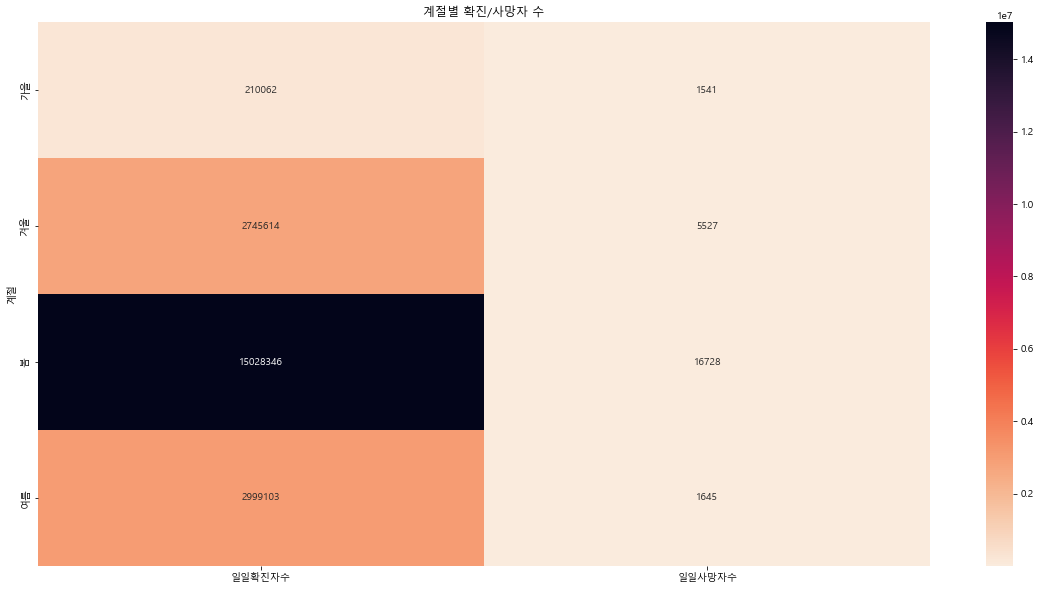

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family = 'Malgun Gothic', size = 10)
plt.figure(figsize=(20,10))
sns.heatmap(df_weather, annot = True, fmt='.0f', cmap='rocket_r')
plt.title('계절별 확진/사망자 수')
plt.show()